In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [124]:
df = pd.read_csv('apartments.csv')

In [125]:
df.describe()

,Unnamed: 0,bedrooms,bathrooms
count,2520.000000,2520.000000,2520.000000
mean,1259.500000,2.551190,2.450794
std,727.605662,0.922868,0.976480
min,0.000000,1.000000,1.000000
25%,629.750000,2.000000,2.000000
50%,1259.500000,3.000000,2.000000
75%,1889.250000,3.000000,3.000000
max,2519.000000,4.000000,5.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2520 non-null   int64 
 1   title       2520 non-null   object
 2   location    2144 non-null   object
 3   bedrooms    2520 non-null   int64 
 4   bathrooms   2520 non-null   int64 
 5   price       2520 non-null   object
 6   rate        2520 non-null   object
dtypes: int64(3), object(4)
memory usage: 137.9+ KB


In [127]:
df.head(10)

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month
5,5,4 Bedroom Apartment / Flat to rent in Kahawa W...,"Thika Rd Nairobi, Kahawa Wendani, Nairobi",4,2,57 750,Per Month
6,6,2 Bedroom Apartment / Flat to rent in Kilimani,"Kilimani, Nairobi",2,3,65 000,Per Month
7,7,3 Bedroom Apartment / Flat to rent in Westlands,NaN,3,3,78 000,Per Month
8,8,1 Bedroom Apartment / Flat to rent in Nyali,"Nyali, Mombasa",1,1,5 000,Per Day
9,9,4 Bedroom Apartment / Flat to rent in Muthaiga,"Muthaiga, Nairobi",4,5,300 000,Per Month


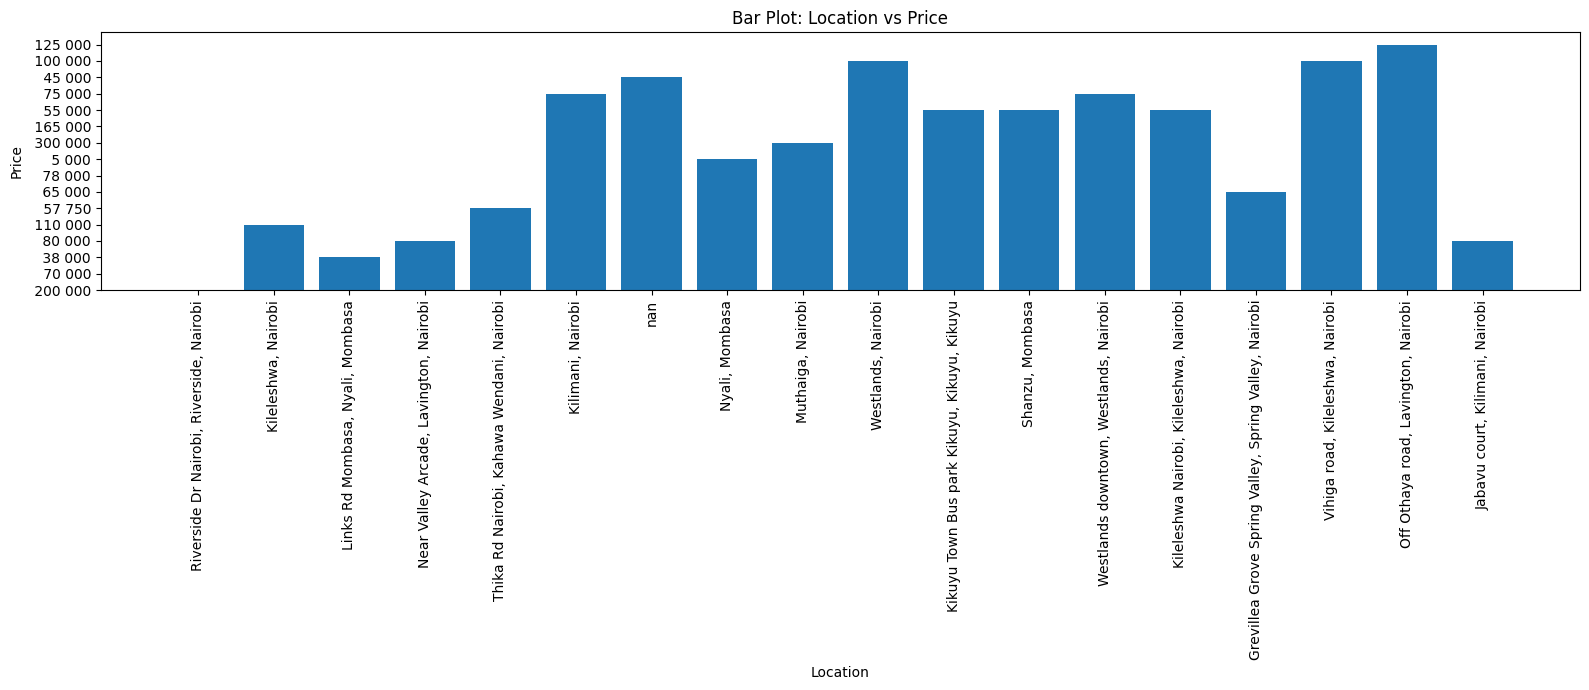

In [128]:
# @title Prices vs Location
plt.figure(figsize=(16, 7))

df['location'] = df['location'].astype(str)

plt.bar(df['location'], df['price'])
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Bar Plot: Location vs Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


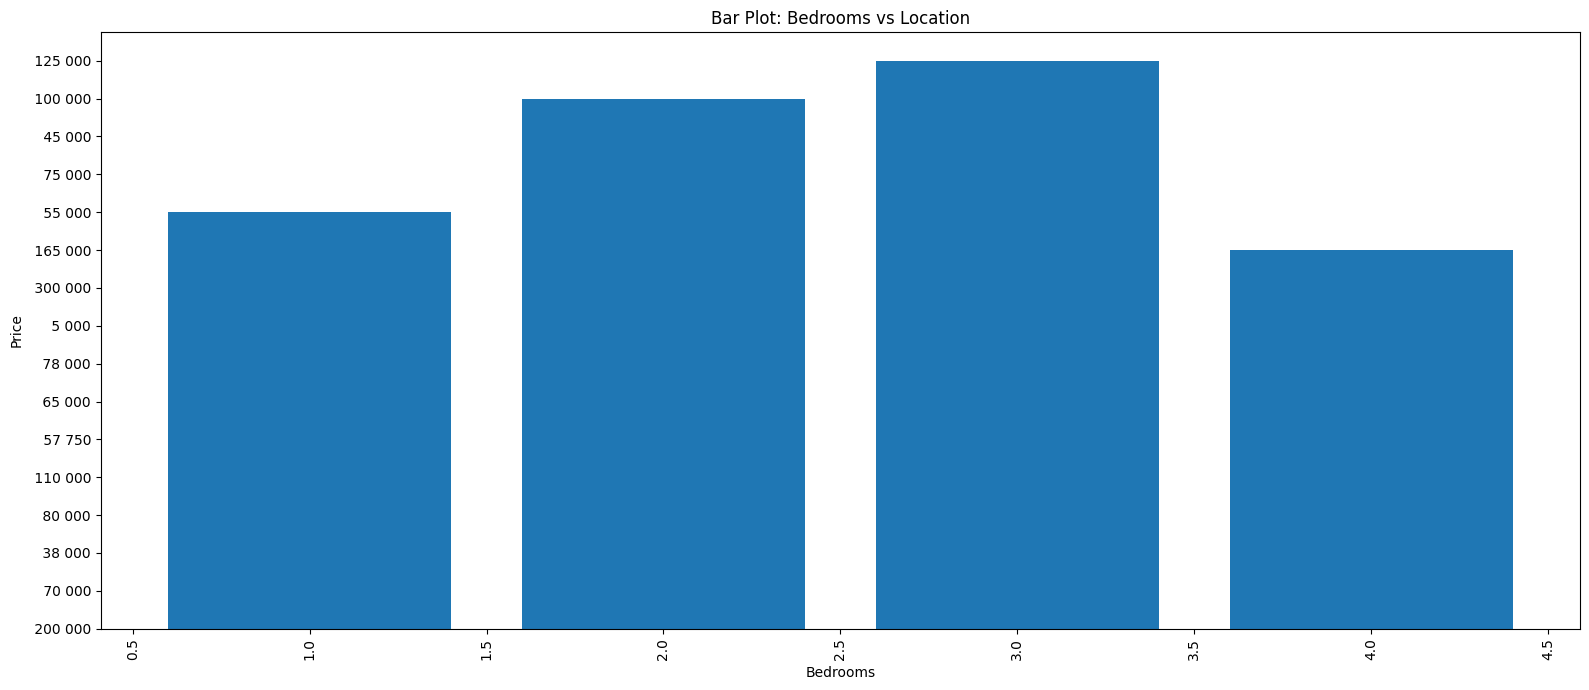

In [129]:
# @title Bedrooms vs Location
plt.figure(figsize=(16, 7))

plt.bar(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bar Plot: Bedrooms vs Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


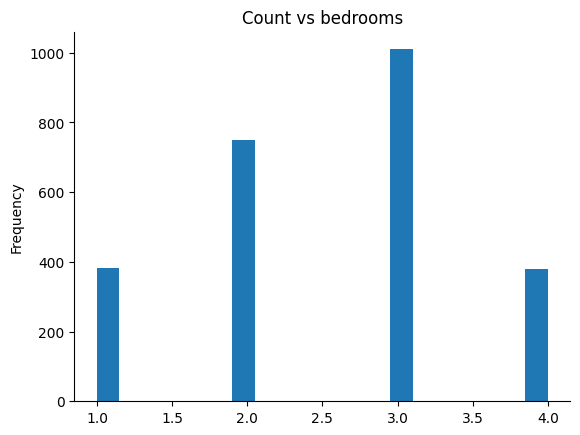

In [130]:
# @title bedrooms

from matplotlib import pyplot as plt
df['bedrooms'].plot(kind='hist', bins=20, title='Count vs bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

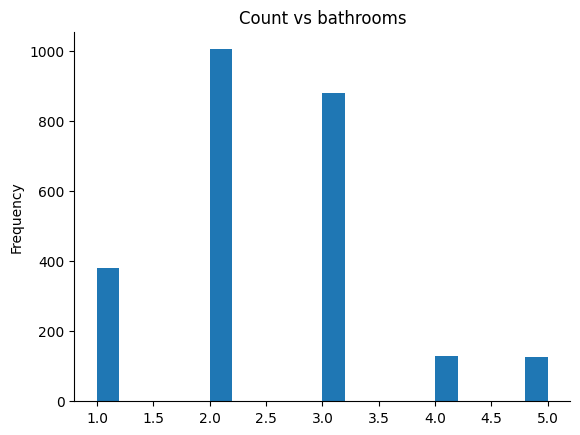

In [131]:
# @title bathrooms

from matplotlib import pyplot as plt
df['bathrooms'].plot(kind='hist', bins=20, title='Count vs bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [132]:
df.isna().sum()

Unnamed: 0    0
title         0
location      0
bedrooms      0
bathrooms     0
price         0
rate          0
dtype: int64

In [133]:
# Sorting missing location using scikit-learn's SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['location'] = imputer.fit_transform(df[['location']])


In [134]:
df.isna().sum()

Unnamed: 0    0
title         0
location      0
bedrooms      0
bathrooms     0
price         0
rate          0
dtype: int64

In [135]:
df.columns

Index(['Unnamed: 0', 'title', 'location', 'bedrooms', 'bathrooms', 'price',
       'rate'],
      dtype='object')

In [136]:
df = df.drop(columns=df.columns[0])

In [137]:
df['price'] = df['price'].str.replace(' ', '')
df['price'] = df['price'].astype(int)

In [138]:
df.columns

Index(['title', 'location', 'bedrooms', 'bathrooms', 'price', 'rate'], dtype='object')

In [139]:
X = df[['location', 'bedrooms', 'bathrooms',]]  # Features
y = df['price']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)

Training set - Features: (2016, 3) Labels: (2016,)
Testing set - Features: (504, 3) Labels: (504,)


In [140]:
# Defining preprocessing steps for categorical and numerical features
categorical_features = ['location']
numerical_features = ['bedrooms', 'bathrooms']

In [141]:
# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # Using drop='first' to avoid multicollinearity
        ('num', StandardScaler(), numerical_features)
    ])

In [142]:
# Defining models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regression', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(random_state=42))
]

In [143]:
# Evaluating each model
for name, model in models:
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"{name} - Mean Squared Error: {mse}, R-squared Score: {r2}")

Linear Regression - Mean Squared Error: 113868712.13423856, R-squared Score: 0.9716134834985848
Random Forest Regression - Mean Squared Error: 0.0, R-squared Score: 1.0
Gradient Boosting Regression - Mean Squared Error: 15353901.092706507, R-squared Score: 0.9961724010172751
